In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("PrePlacement.csv")

In [3]:
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [4]:
dataset.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

## ND - Probability Density Function

In [5]:
def get_PDF_Probability(dataset,startrange,endrange):
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scipy.stats import norm
    
    # kde - Kernal Density Estimation plot (forms the curve)
    # kde_kws - Appearence {'color': 'red', 'linewidth': 2, 'alpha': 0.5 }(for transperency)
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    
    # Drawing range line
    plt.axvline(startrange,color='Red')
    plt.axvline(endrange,color='Red')
    
    # Generate a sample
    sample = dataset
    
    # Calculate Paremeters
    sample_mean = sample.mean()
    sample_stdD = sample.std()
    print("Mean ={:.3f}, Standard Deviation ={:.3f}".format(sample_mean,sample_stdD))
    
    # Define the Distribution
    Dist = norm(sample_mean,sample_stdD)
    
    # Sample Probabilities for a range of outcomes
    values = [value for value in range(startrange,endrange)]
    Probabilities = [Dist.pdf(value) for value in values]         # dist.pdf => is a method for obtaining the probability density at given values for a continuous distribution.
    Prob = sum(Probabilities)
    print("The Area between the range ({},{}) : {}".format(startrange,endrange,sum(Probabilities)))
    return Prob

Mean =67.303, Standard Deviation =10.827
The Area between the range (60,80) : 0.6346413295441957


C:\Users\priya\AppData\Local\Temp\ipykernel_7064\2162351684.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


0.6346413295441957

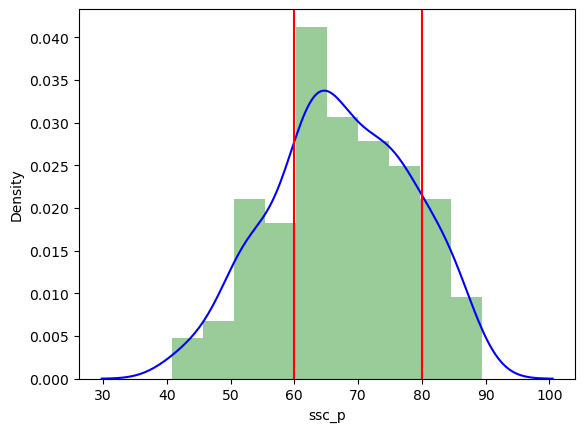

In [6]:
get_PDF_Probability(dataset["ssc_p"],60,80)

Mean =66.333, Standard Deviation =10.898
The Area between the range (40,60) : 0.2583592553363288


C:\Users\priya\AppData\Local\Temp\ipykernel_7064\2162351684.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


0.2583592553363288

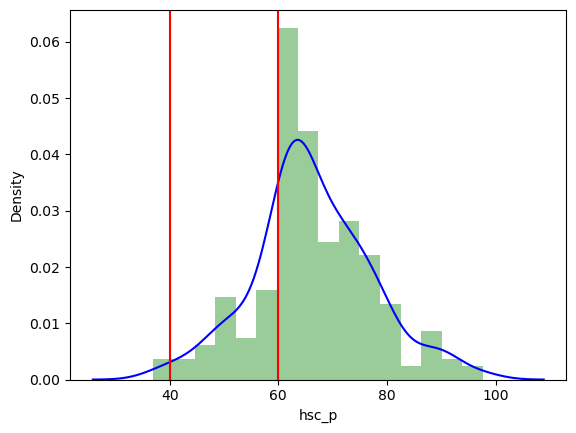

In [7]:
get_PDF_Probability(dataset["hsc_p"],40,60)

## Cumulative Density Function

In [8]:
#!pip install statsmodels

In [9]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset['ssc_p'])
ecdf(70)

0.6093023255813953

## Standard Normal Distribution -> (Mean = 0, StdD = 1)

In [29]:
def standardND(dataset):
    import seaborn as sns
# Calculate mean and standard deviation    
    mean = dataset.mean()
    stdD = dataset.std()
# Calculate Z-scores    
    Zscore = [((value-mean)/stdD) for value in dataset]
# Plot the distribution of Zscore using distplot    
    sns.distplot(Zscore,kde = True)
# Return the mean of the Z-scores (which should be close to 0)    
    return sum(Zscore) / len(Zscore)

#### => The resulting list Zscore contains the Z-scores for all values in the dataset. These Z-scores tells how far each value is from the mean in terms of standard deviations.
###### A Z-score of 0 means the value is exactly at the mean.
###### A positive Z-score means the value is above the mean.
###### A negative Z-score means the value is below the mean.

C:\Users\priya\AppData\Local\Temp\ipykernel_7064\480882094.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Zscore,kde = True)


-4.2911410858767677e-16

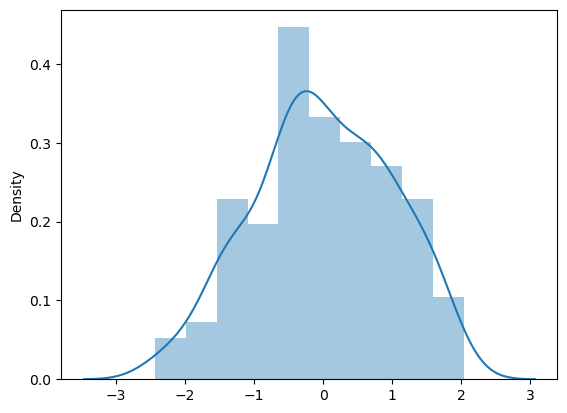

In [35]:
standardND(dataset['ssc_p'])